In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("ex1data1.txt", delimiter=',')
x = data[:,0]   
y = data[:,1]

In [4]:
x_train = x[:70]
x_test = x[70:]
y_train = y[:70]
y_test = y[70:]

In [5]:
def f_wb(x, w, b):
    return np.dot(x,w)+b

In [ ]:
def compute_cost(x,y,w,b):
    m = len(x_train)
    cost = 0
    for i in range(m):
        error = f_wb(x[i],w,b) -y[i]
        cost += error**2
    cost /= m
    return cost

In [ ]:
def compute_gradient(x,y,w,b):
    m = len(x_train)
    dj_dw = 0
    dj_db = 0
    for i in range (m):
        dj_dw += (f_wb(x[i],w,b) - y[i])*x[i]
        dj_db += f_wb(x[i], w,b) - y[i]
    dj_dw /= m 
    dj_db /=m
    return dj_dw, dj_db

In [8]:
def gradient_descent(x,y,w,b,alpha = 0.01, epoch = 1500):
    accuracies = []
    for i in range(epoch):
        tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, w, b)
        w -= alpha*tmp_dj_dw
        b -= alpha*tmp_dj_db
        acc = accuracy(x_test, y_test, w, b)
        accuracies.append(acc)
    return w, b, accuracies

In [9]:
def accuracy(x,y,w,b):
    for i in range(len(x)):
        yhat = f_wb(x[i], w, b)
    acc = (1 - np.abs(yhat-y[i])/y[i])*100
    return acc

In [10]:
init_w = np.random.rand(1)
init_b = 0

In [11]:
w,b, accu = gradient_descent(x_train, y_train, init_w, init_b)

In [12]:
w

array([1.15114554])

In [13]:
b

array([-2.99580154])

In [15]:
f_x = []
for i in data[:, 0]:
    f_x.append(w*i + b)

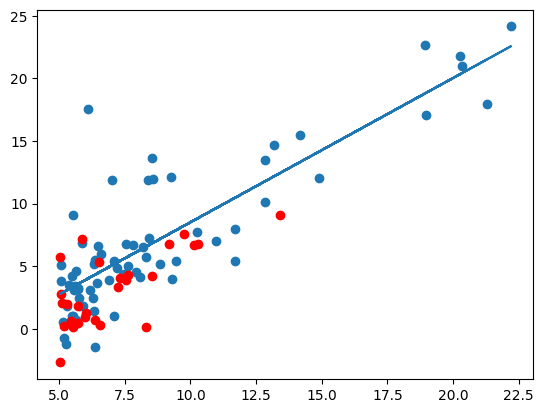

In [16]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='red')
plt.plot(data[:,0],f_x)